Hello, I am JYC. This notebook implements all the sub-tasks in experimental topic 5. I will explain the logic behind each concept to assist students who are not proficient in coding to quickly grasp the key points and complete the experiment.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from IPython.display import clear_output

### "Survival of the Fittest" Evolutionary Strategy
We use the agentsim package's pdgame environment to simulate this process. For detailed information, refer to the second subtask in `exp3.ipynb`.

In [6]:
# skip

### Linear Threshold Model

Here, we implement the Linear Threshold Model to simulate information propagation within a cluster. In this model, the network is represented as a directed graph $ G = (V, E) $; nodes exist in one of two states: active or inactive. Once a node is activated, it remains in the active state until the information propagation ends.

#### Model Details:

- **Graph Representation**: The network is represented as a directed graph $ G = (V, E) $, where $ V $ is the set of nodes and $ E $ is the set of directed edges.
- **Node States**: Each node in the graph can be in one of two states: active or inactive.
- **Activation Persistence**: Once a node is activated, it remains active for the duration of the information propagation process.
- **Activation Threshold**: Each node has an independent activation threshold that reflects the difficulty of activating the node by its neighbors. A higher threshold indicates that the node is harder to activate, while a lower threshold indicates that the node is easier to activate.
- **Activation Condition**: A node becomes activated if the total activation weight from its neighbors meets or exceeds its activation threshold.

In [7]:
def initialize_graph(num_nodes, num_edges):
    G = nx.DiGraph()
    for _ in range(num_edges):
        u = random.randint(1, num_nodes)
        v = random.randint(1, num_nodes)
        while u == v or G.has_edge(u, v):
            u = random.randint(1, num_nodes)
            v = random.randint(1, num_nodes)
        G.add_edge(u, v)
    return G


def set_thresholds(G):
    return {node: random.uniform(0.1, 0.9) for node in G.nodes()}


def set_edge_weights(G):
    return {(u, v): random.uniform(0.1, 1.0) for u, v in G.edges()}


def linear_threshold_model(G, thresholds, edge_weights, initial_activated):
    activated = set(initial_activated)
    newly_activated = set(initial_activated)
    states = [activated.copy()]

    while newly_activated:
        new_activations = set()
        for node in G.nodes():
            if node not in activated:
                neighbors = list(G.predecessors(node))
                influence = sum(
                    edge_weights[(neighbor, node)]
                    for neighbor in neighbors
                    if neighbor in activated
                )
                if influence >= thresholds[node]:
                    new_activations.add(node)
        newly_activated = new_activations
        activated.update(new_activations)
        states.append(activated.copy())
    return states


def update_and_visualize(G, initial_activated, interval):
    thresholds = set_thresholds(G)
    edge_weights = set_edge_weights(G)
    states = linear_threshold_model(G, thresholds, edge_weights, initial_activated)
    pos = nx.circular_layout(G)

    for t, state in enumerate(states):
        clear_output(wait=True)
        node_colors = ["red" if node in state else "lightblue" for node in G.nodes()]
        nx.draw(
            G,
            pos,
            node_color=node_colors,
            node_size=800,
            font_size=16,
            font_color="white",
        )

        edge_labels = {edge: f"{weight:.2f}" for edge, weight in edge_weights.items()}
        nx.draw_networkx_edge_labels(
            G, pos, edge_labels=edge_labels, font_color="black"
        )

        threshold_labels = {node: f"{thresholds[node]:.2f}" for node in G.nodes()}
        nx.draw_networkx_labels(G, pos, labels=threshold_labels, font_color="black")

        plt.show()
        plt.pause(interval)
        plt.clf()

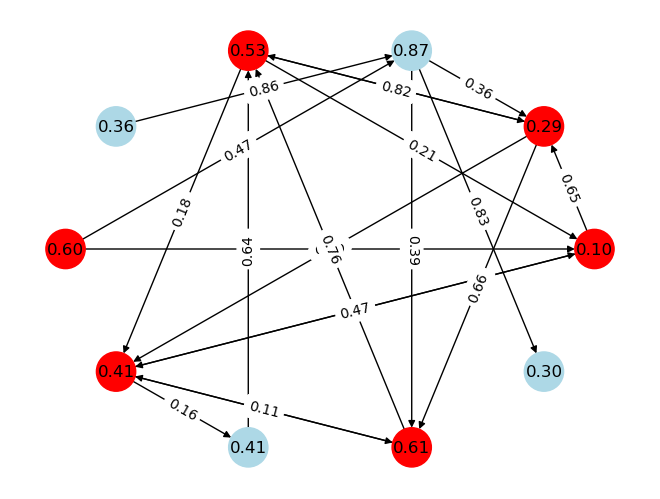

<Figure size 640x480 with 0 Axes>

In [8]:
num_nodes = 10
num_edges = 20
G = initialize_graph(num_nodes, num_edges)
initial_activated = [random.randint(1, num_nodes)]
update_and_visualize(G, initial_activated, interval=1)

## Epidemic Model

In this section, we implement various epidemic models:

### SI Model

The population in the region is divided into susceptible nodes (S) and infectious nodes (I). The infectious nodes (I) are the source of information, spreading the information to susceptible nodes (S) with a certain probability $\beta$. Infectious nodes (I) cannot stop spreading information. The following equations describe the mechanism of the SI model, where $i_0$ represents the initial proportion of infectious nodes in the total population.

$$
\begin{aligned}
\frac{ds(t)}{dt} &= -\beta s(t) i(t) \\
\frac{ds(t)}{dt} &= \beta s(t) i(t) \\
\end{aligned} \\
s(t) + i(t) = 1 \quad i(0) = i_0
$$

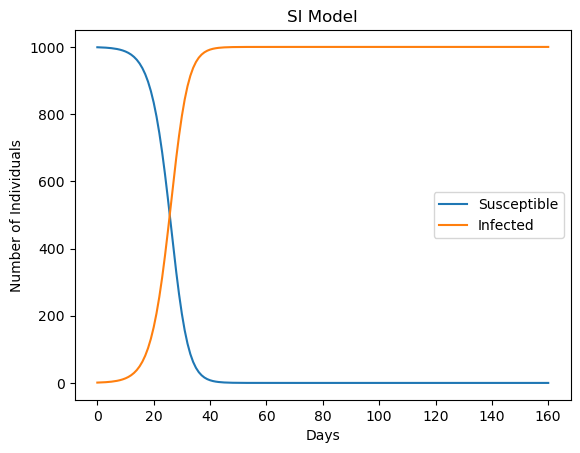

In [9]:
def SI_model(beta, S0, I0, days):
    S = [S0]
    I = [I0]
    N = S0 + I0

    for _ in range(days):
        dS = -beta * S[-1] * I[-1] / N
        dI = beta * S[-1] * I[-1] / N

        S.append(S[-1] + dS)
        I.append(I[-1] + dI)

    return np.array(S), np.array(I)


beta = 0.3
S0 = 999
I0 = 1
days = 160

S, I = SI_model(beta, S0, I0, days)

plt.plot(S, label="Susceptible")
plt.plot(I, label="Infected")
plt.xlabel("Days")
plt.ylabel("Number of Individuals")
plt.legend()
plt.title("SI Model")
plt.show()

### SIR Model

The SIR model includes the number of susceptible nodes (S(t)), which represents the number of people at time t who have not encountered the information but may encounter it. The number of infectious nodes (I(t)) represents the number of people spreading the information at time t. The number of removed (immune) nodes (R(t)) represents the number of people immune to the information at time t. Unlike the SI model, in the SIR model, infectious nodes (I) become immune nodes (R) through a proportional coefficient $\gamma$, and immune nodes (R) cannot spread information. The following equations describe the mechanism of the SIR model, where $i_0$ represents the initial proportion of infectious nodes in the total population.

$$
\begin{aligned}
\frac{ds(t)}{dt} &= -\beta s(t) i(t) \\
\frac{di(t)}{dt} &= \beta s(t) i(t) - \gamma i(t) \\
\frac{dr(t)}{dt} &= \gamma i(t) 
\end{aligned} \\

s(t) + i(t) + r(t) = 1 \\
i(0) = i_0, \quad s(0) = s_0
$$

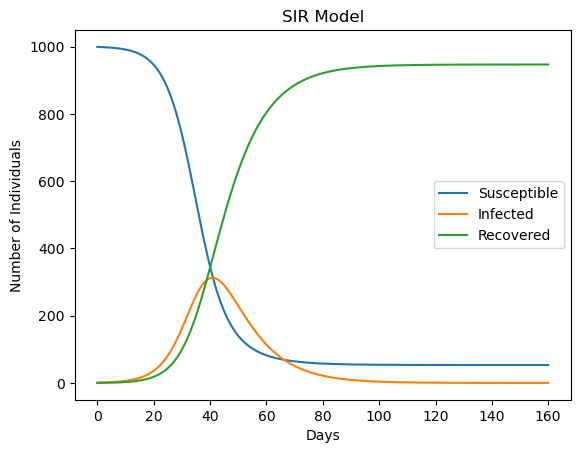

In [10]:
def SIR_model(beta, gamma, S0, I0, R0, days):
    S = [S0]
    I = [I0]
    R = [R0]
    N = S0 + I0 + R0

    for _ in range(days):
        dS = -beta * S[-1] * I[-1] / N
        dI = beta * S[-1] * I[-1] / N - gamma * I[-1]
        dR = gamma * I[-1]

        S.append(S[-1] + dS)
        I.append(I[-1] + dI)
        R.append(R[-1] + dR)

    return np.array(S), np.array(I), np.array(R)


beta = 0.3
gamma = 0.1
S0 = 999
I0 = 1
R0 = 0
days = 160

S, I, R = SIR_model(beta, gamma, S0, I0, R0, days)


plt.plot(S, label="Susceptible")
plt.plot(I, label="Infected")
plt.plot(R, label="Recovered")
plt.xlabel("Days")
plt.ylabel("Number of Individuals")
plt.legend()
plt.title("SIR Model")
plt.show()

### SIS Model

In the SIS model, the infectious nodes (I) are the source of information, spreading it to susceptible nodes (S) with a certain probability $\beta$. Infectious nodes (I) are cured with a certain probability $\gamma$ and become susceptible nodes (S). Susceptible nodes (S) that come into contact with infectious nodes (I) have a certain probability of becoming infectious.

$$
\begin{aligned}
\frac{ds(t)}{dt} &= -\beta s(t) i(t) + \gamma i(t) \\
\frac{di(t)}{dt} &= \beta s(t) i(t) - \gamma i(t)
\end{aligned} \\
s(t) + i(t) = 1 \quad i(0) = i_0
$$

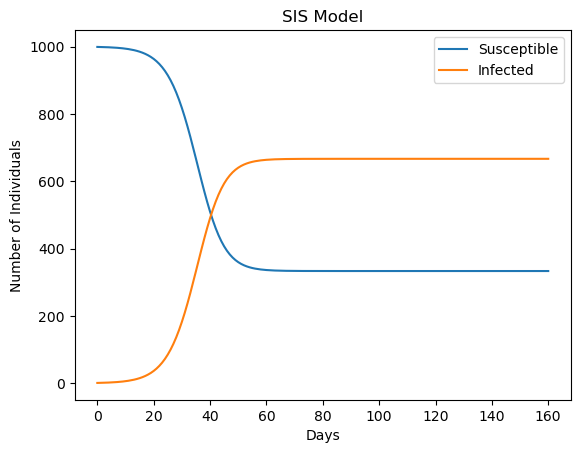

In [11]:
def SIS_model(beta, gamma, S0, I0, days):
    S = [S0]
    I = [I0]
    N = S0 + I0

    for _ in range(days):
        dS = -beta * S[-1] * I[-1] / N + gamma * I[-1]
        dI = beta * S[-1] * I[-1] / N - gamma * I[-1]

        S.append(S[-1] + dS)
        I.append(I[-1] + dI)

    return np.array(S), np.array(I)


beta = 0.3
gamma = 0.1
S0 = 999
I0 = 1
days = 160

S, I = SIS_model(beta, gamma, S0, I0, days)

plt.plot(S, label="Susceptible")
plt.plot(I, label="Infected")
plt.xlabel("Days")
plt.ylabel("Number of Individuals")
plt.legend()
plt.title("SIS Model")
plt.show()

### SIRS Model

In the SIRS model, the infectious nodes (I) are the source of information, spreading it to susceptible nodes (S) with a certain probability $\beta$. Infectious nodes (I) become immune nodes (R) with a proportional coefficient $\gamma$, and immune nodes (R) cannot spread the information. However, this immunity is temporary, and a proportion $\delta R$ of immune nodes will become susceptible nodes (S) again over time.

$$
\begin{aligned}
\frac{ds(t)}{dt} &= -\beta s(t) i(t) + \delta r(t) \\
\frac{di(t)}{dt} &= \beta s(t) i(t) - \gamma i(t) \\
\frac{dr(t)}{dt} &= \gamma i(t) - \delta r(t) \\
\end{aligned} \\
s(t) + i(t) + r(t) = 1 \\
i(0) = i_0, \quad s(0) = s_0
$$

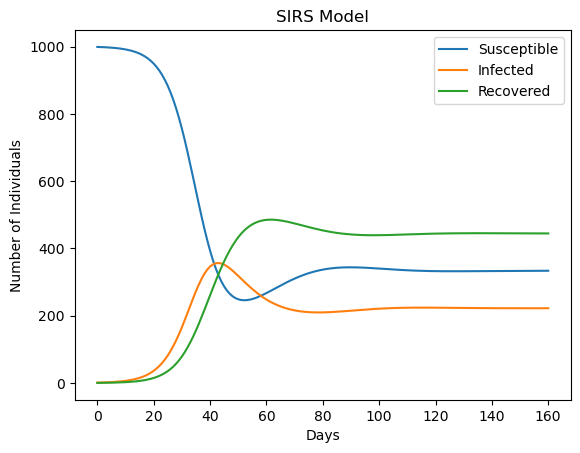

In [12]:
def SIRS_model(beta, gamma, delta, S0, I0, R0, days):
    S = [S0]
    I = [I0]
    R = [R0]
    N = S0 + I0 + R0

    for _ in range(days):
        dS = -beta * S[-1] * I[-1] / N + delta * R[-1]
        dI = beta * S[-1] * I[-1] / N - gamma * I[-1]
        dR = gamma * I[-1] - delta * R[-1]

        S.append(S[-1] + dS)
        I.append(I[-1] + dI)
        R.append(R[-1] + dR)

    return np.array(S), np.array(I), np.array(R)


beta = 0.3
gamma = 0.1
delta = 0.05
S0 = 999
I0 = 1
R0 = 0
days = 160

S, I, R = SIRS_model(beta, gamma, delta, S0, I0, R0, days)


plt.plot(S, label="Susceptible")
plt.plot(I, label="Infected")
plt.plot(R, label="Recovered")
plt.xlabel("Days")
plt.ylabel("Number of Individuals")
plt.legend()
plt.title("SIRS Model")
plt.show()

### SEIR Model

In the SEIR model, susceptible nodes (S) become exposed nodes (E) after contact with infectious nodes (I) with a certain probability $\beta$. Exposed nodes (E) cannot turn susceptible nodes (S) into infectious (I) or exposed (E) upon contact. Exposed nodes (E) become infectious nodes (I) with a certain probability $\omega$. Infectious nodes (I) can turn susceptible nodes (S) into exposed nodes (E). Infectious nodes (I) become immune nodes (R) with a certain probability $\gamma$. Immune nodes (R) have permanent immunity.

$$
\begin{aligned}
\frac{ds(t)}{dt} &= -\beta s(t) i(t) \\
\frac{de(t)}{dt} &= \beta s(t) i(t) - \omega e(t) \\
\frac{di(t)}{dt} &= \omega e(t) - \gamma i(t) \\
\frac{dr(t)}{dt} &= \gamma i(t) \\
\end{aligned} \\
s(t) + e(t) + i(t) + r(t) = 1 \\
e(0) = e_0, \quad i(0) = i_0, \quad r(0) = r_0
$$

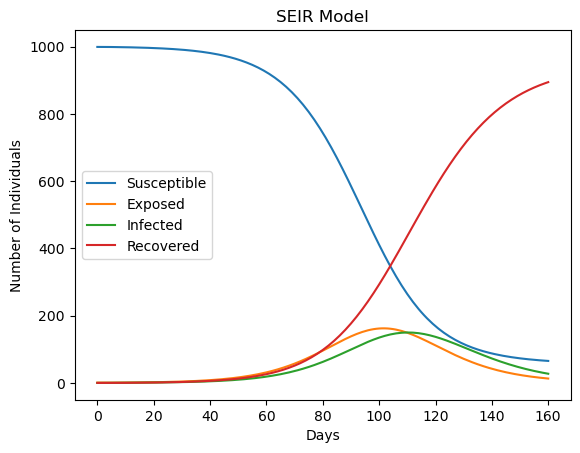

: 

In [13]:
def SEIR_model(beta, sigma, gamma, S0, E0, I0, R0, days):
    S = [S0]
    E = [E0]
    I = [I0]
    R = [R0]
    N = S0 + E0 + I0 + R0

    for _ in range(days):
        dS = -beta * S[-1] * I[-1] / N
        dE = beta * S[-1] * I[-1] / N - sigma * E[-1]
        dI = sigma * E[-1] - gamma * I[-1]
        dR = gamma * I[-1]

        S.append(S[-1] + dS)
        E.append(E[-1] + dE)
        I.append(I[-1] + dI)
        R.append(R[-1] + dR)

    return np.array(S), np.array(E), np.array(I), np.array(R)


beta = 0.3
sigma = 0.1
gamma = 0.1
S0 = 999
E0 = 1
I0 = 0
R0 = 0
days = 160

S, E, I, R = SEIR_model(beta, sigma, gamma, S0, E0, I0, R0, days)


plt.plot(S, label="Susceptible")
plt.plot(E, label="Exposed")
plt.plot(I, label="Infected")
plt.plot(R, label="Recovered")
plt.xlabel("Days")
plt.ylabel("Number of Individuals")
plt.legend()
plt.title("SEIR Model")
plt.show()